In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series


In [2]:
# Прочитайте csv файл (використовуйте функцію read_csv)
p3t1 = pd.read_csv('dataset.csv')
print(p3t1)


                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [3]:
# Виведіть перші п'ять рядків (використовується функція head)
print(p3t1.head(5))  # print(p3t1.head()) -> 5 by default


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [4]:
# Виведіть розміри датасету (використовуйте атрибут shape)
print(p3t1.shape)


(550, 7)


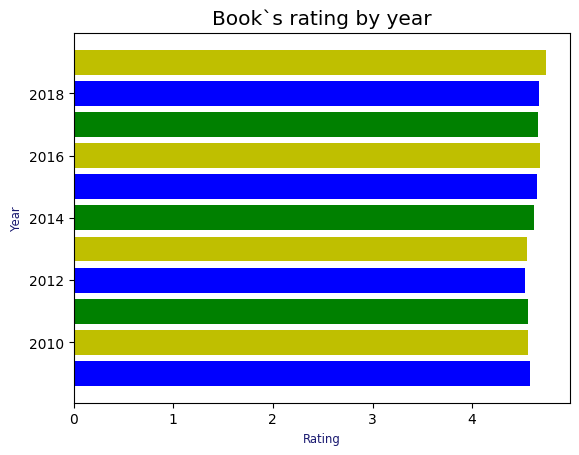

In [5]:
p3t1_year = p3t1.groupby(['Year'])
p3t1_ = p3t1_year.agg({'User Rating': ['min', 'max', 'mean']})
p3t1_
plt.barh(
    p3t1_.index,
    p3t1_['User Rating']['mean'],
    color=["b", "y", "g"],
)

plt.xlabel("Rating", fontsize="small", color="midnightblue")
plt.ylabel("Year", fontsize="small", color="midnightblue")
plt.title("Book`s rating by year", fontsize=14.5)
plt.show()


<Axes: xlabel='Year', ylabel='User Rating'>

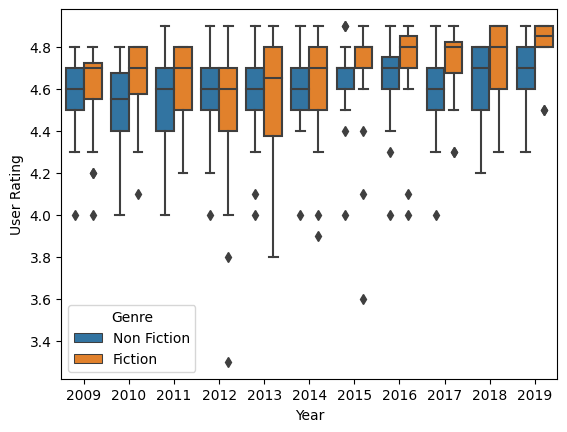

In [6]:
import seaborn as sns
sns.boxplot(x="Year", y="User Rating", hue="Genre", data=p3t1)


In [7]:
# Відповідь: Про скільки книг зберігає дані датасет? Відповідь: p3t1.shape[0] -> 550
print(f'Відповідь: {p3t1.shape[0]}')  # 550


Відповідь: 550


In [8]:
# Для спрощення подальшої роботи давайте трохи підправимо назви змінних.

p3t1.columns = ['name', 'author', 'user_rating',
                'reviews', 'price', 'year', 'genre']
print(p3t1.head())


                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [10]:
# Первинне дослідження даних
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
def get_proportion_of_missing_data(df: DataFrame):
    map_df = df.isnull()  # alias .isna()
    nan_in_df = pd.DataFrame()
    nan_in_df['missing_data'] = np.sum(map_df, axis=0)
    nan_in_df['proportion_of_missing_data'] = np.sum(
        map_df, axis=0) / map_df.shape[0]
    nan_in_df['relative_proportion_of_missing_data (%)'] = nan_in_df['proportion_of_missing_data'] * 100

    return nan_in_df


p3t2 = get_proportion_of_missing_data(p3t1)
p3t2



,missing_data,proportion_of_missing_data,relative_proportion_of_missing_data (%)
name,0,0.0,0.0
author,0,0.0,0.0
user_rating,0,0.0,0.0
reviews,0,0.0,0.0
price,0,0.0,0.0
year,0,0.0,0.0
genre,0,0.0,0.0


In [11]:
# Відповідь: Чи є в якихось змінних пропуски? (Так / ні) Відповідь: ні
print(
    f'''Відповідь: {'Так' if p3t2[p3t2.columns[0]].sum() > 0 else 'ні'}''')  # ні


Відповідь: ні


In [12]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
#  Тобто унікальні з усіх, а не одиничні, що зустрічаються 1 раз серед усіх?
print(pd.unique(p3t1['genre']))


['Non Fiction' 'Fiction']


In [13]:
# Відповідь: Які є унікальні жанри? Відповідь: ['Non Fiction' 'Fiction']
unique_genre = np.insert(pd.unique(p3t1['genre']), 0, 'Відповідь:')
_ = [print(el, end=' / ') for el in unique_genre]


Відповідь: / Non Fiction / Fiction / 

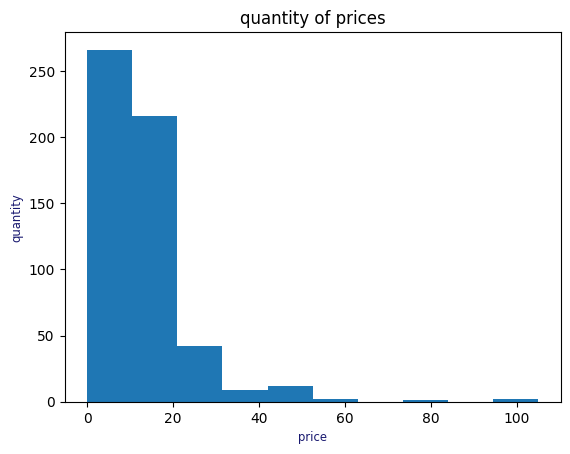

In [14]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
plt.hist(p3t1['price'])
plt.xlabel('price', fontsize='small', color='midnightblue')
plt.ylabel('quantity', fontsize='small', color='midnightblue')
plt.title('quantity of prices', fontsize=12)
plt.show()


In [15]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
print(
      np.max(p3t1['price']), '/',
      p3t1['price'].describe().loc['min'], '/',
      p3t1['price'].describe().loc['mean'], '/',
      p3t1['price'].describe().loc['50%'],
      )


105 / 0.0 / 13.1 / 11.0


In [16]:
# Відповідь: Максимальна ціна? Відповідь: 105
print(f'''Відповідь: {p3t1['price'].max()}''')  # 105.0


Відповідь: 105


In [17]:
# Відповідь: Мінімальна ціна? Відповідь: 0
print(f'''Відповідь: {p3t1['price'].min()}''')  # 0


Відповідь: 0


In [18]:
# Відповідь: Середня ціна? Відповідь: 13.1
print(f'''Відповідь: {p3t1['price'].mean()}''')  # 13.1


Відповідь: 13.1


In [19]:
# Відповідь: Медіанна ціна? Відповідь: 11.0
print(f'''Відповідь: {p3t1['price'].median()}''')  # 11.0


Відповідь: 11.0


In [20]:
# Пошук та сортування даних
# Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9
print(f'''Відповідь: {p3t1['user_rating'].max()}''')  # 4.9


Відповідь: 4.9


In [21]:
# Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52
print('Відповідь: ', p3t1['user_rating'][p3t1['user_rating']
      == p3t1['user_rating'].max()].describe().loc['count'])  # 52


Відповідь:  52.0


In [22]:
# Відповідь: Яка книга має найбільше відгуків? Відповідь:  # 534
print('Відповідь: ', p3t1[p3t1['reviews'] == p3t1['reviews'].max()])  # 534


Відповідь:                          name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


In [23]:
# Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча
# (можна використати проміжний датафрейм)? Відповідь: 277
group_1 = p3t1[p3t1['year'] == 2015].nlargest(n=50, columns=['user_rating'])
print('Відповідь: ', group_1[group_1['price'] == group_1['price'].max()])  # 277


Відповідь:                                                    name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  


In [24]:
# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році
# (використовуйте &)? Відповідь: 20
print('Відповідь: ', p3t1[(p3t1['genre'] ==
      'Fiction') & (p3t1['year'] == 2010)].nlargest(n=50, columns=['user_rating']).shape[0])  # 20


Відповідь:  20


In [25]:
# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та
# 2011 роках (використовуйте | або функцію isin)? Відповідь: 1
print('Відповідь: ', p3t1[(p3t1['year'] == 2010) | (
    p3t1['year'] == 2011)][p3t1['user_rating'] == 4.9].shape[0])  # 1

print('Відповідь: ', p3t1[p3t1['year'].isin([2010, 2011])
      == True][p3t1['user_rating'] == 4.9].shape[0])  # 1


Відповідь:  1
Відповідь:  1


/tmp/ipykernel_22175/127488072.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Відповідь: ', p3t1[(p3t1['year'] == 2010) | (
/tmp/ipykernel_22175/127488072.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Відповідь: ', p3t1[p3t1['year'].isin([2010, 2011])


In [26]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу
# в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
print(p3t3 := p3t1[(p3t1['year'] == 2015) & (
    p3t1['price'] < 8)].sort_values(by=['price']))


                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [27]:
# Відповідь: Яка книга остання у відсортованому списку? Відповідь: 253
print(p3t3.tail(1))  # 253


                                      name       author  user_rating  reviews  \
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney          4.8     6169   

     price  year    genre  
253      7  2015  Fiction  


In [28]:
# Агрегування даних та з'єднання таблиць...
print(p3t1_gby := p3t1.groupby(['genre']))
print(p3t4 := p3t1_gby.agg({'price': ['min', 'max']}))


            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


In [29]:
# Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82
print('Відповідь: ', (p3t4.loc['Fiction'])[1])  # 82


Відповідь:  82


In [30]:
# Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0
print('Відповідь: ', p3t4.loc['Fiction'][0])  # 0


Відповідь:  0


In [31]:
# Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105
print('Відповідь: ', p3t4.loc['Non Fiction'][1])  # 82


Відповідь:  105


In [32]:
# Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0
print('Відповідь: ', p3t4.loc['Non Fiction'][0])  # 0


Відповідь:  0


In [33]:
# Тепер створіть новий датафрейм, який вміщатиме 
# кількість книг для кожного з авторів (використовуйте функції groupby та agg, 
# для підрахунку кількості використовуйте count). 
print(new_df := p3t1.groupby(['author'])['author'].count())


author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: author, Length: 248, dtype: int64


In [34]:
# Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248
print('Відповідь: ', new_df.shape[0])  # 248


Відповідь:  248


In [35]:
# Відповідь: Який автор має найбільше книг? Відповідь:  Jeff Kinney
print('Відповідь: ', new_df[new_df == new_df.max()].index[0])  # Jeff Kinney


Відповідь:  Jeff Kinney


In [36]:
# Відповідь: Скільки книг цього автора? Відповідь:  12
print('Відповідь: ', new_df.max())  # 12
print('Відповідь: ', new_df[new_df == new_df.max()][0])  # 12


Відповідь:  12
Відповідь:  12


In [37]:
# Тепер створіть другий датафрейм, який буде вміщати
# середній рейтинг для кожного автора (використовуйте функції
# groupby та agg, для підрахунку середнього значення використовуйте mean).
# Не беріть усі стовпці, виберете тільки потрібні (???)
print(new_df2 := p3t1.groupby(['author'])['user_rating'].mean())


author
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
                                ...   
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000
Name: user_rating, Length: 248, dtype: float64


In [38]:
# Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:
print('Відповідь: ', new_df2[new_df2 == new_df2.min()].index[0])  # Donna Tartt


Відповідь:  Donna Tartt


In [39]:
# Відповідь: Який у цього автора середній рейтинг? Відповідь:
print('Відповідь: ', new_df2.min())  # 3.9
print('Відповідь: ', new_df2[new_df2 == new_df2.min()][0])  # 3.9


Відповідь:  3.9
Відповідь:  3.9


In [40]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно
# кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1).
# Збережіть результат у змінну
p3t5 = pd.concat([new_df, new_df2], axis=1)
p3t5.columns = ['books_quantity', 'user_raiting']
print(p3t5)


                            books_quantity  user_raiting
author                                                  
Abraham Verghese                         2      4.600000
Adam Gasiewski                           1      4.400000
Adam Mansbach                            1      4.800000
Adir Levy                                1      4.800000
Admiral William H. McRaven               1      4.700000
...                                    ...           ...
Walter Isaacson                          3      4.566667
William Davis                            2      4.400000
William P. Young                         2      4.600000
Wizards RPG Team                         3      4.800000
Zhi Gang Sha                             2      4.600000

[248 rows x 2 columns]


In [41]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом
# (використовуйте функцію sort_values)
print(p3t6 := p3t5.sort_values(by=['books_quantity', 'user_raiting']))


                                    books_quantity  user_raiting
author                                                          
Muriel Barbery                                   1      4.000000
Chris Cleave                                     1      4.100000
Ian K. Smith M.D.                                1      4.100000
Pierre Dukan                                     1      4.100000
Elizabeth Strout                                 1      4.200000
...                                            ...           ...
American Psychological Association              10      4.500000
Suzanne Collins                                 11      4.663636
Gary Chapman                                    11      4.736364
Rick Riordan                                    11      4.772727
Jeff Kinney                                     12      4.800000

[248 rows x 2 columns]


In [42]:
# Відповідь: Який автор перший у списку? Відповідь: Muriel Barbery
print(p3t6.head(1).index[0])  # Muriel Barbery


Muriel Barbery


<Axes: xlabel='year', ylabel='price'>

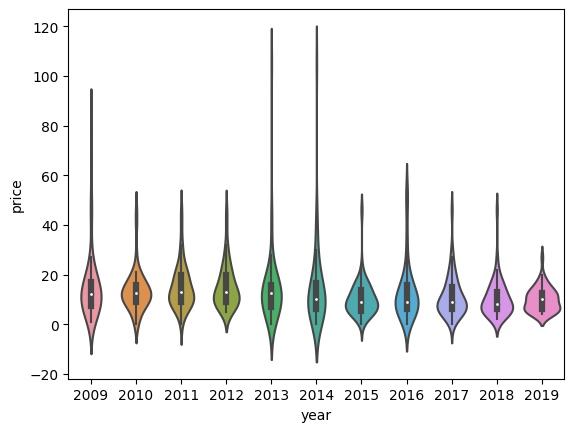

In [43]:
# sns.scatterplot(x='year', y='price', data=p3t1)
# sns.swarmplot(x='year', y='price', data=p3t1)
sns.violinplot(x="year", y="price", data=p3t1)


<Axes: xlabel='reviews', ylabel='price'>

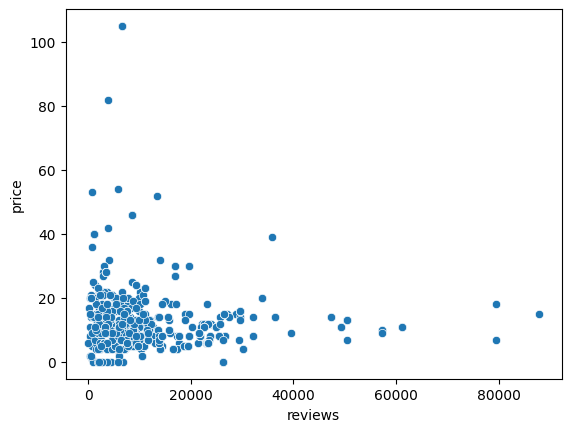

In [44]:
sns.scatterplot(x='reviews', y='price', data=p3t1)
